<a href="https://colab.research.google.com/github/NoobBeginnerReal/Credit-Card-Fraud-Detection/blob/main/Credit_Card_Fraud_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# import libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
df = pd.read_csv('credit_card_fraud.csv')
df

,trans_date_trans_time,merchant,category,amt,city,state,lat,long,city_pop,job,dob,trans_num,merch_lat,merch_long,is_fraud
0,2019-01-01 00:00:44,"Heller, Gutmann and Zieme",grocery_pos,107.23,Orient,WA,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,49.159047,-118.186462,0
1,2019-01-01 00:00:51,Lind-Buckridge,entertainment,220.11,Malad City,ID,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,43.150704,-112.154481,0
2,2019-01-01 00:07:27,Kiehn Inc,grocery_pos,96.29,Grenada,CA,41.6125,-122.5258,589,Systems analyst,1945-12-21,413636e759663f264aae1819a4d4f231,41.657520,-122.230347,0
3,2019-01-01 00:09:03,Beier-Hyatt,shopping_pos,7.77,High Rolls Mountain Park,NM,32.9396,-105.8189,899,Naval architect,1967-08-30,8a6293af5ed278dea14448ded2685fea,32.863258,-106.520205,0
4,2019-01-01 00:21:32,Bruen-Yost,misc_pos,6.85,Freedom,WY,43.0172,-111.0292,471,"Education officer, museum",1967-08-02,f3c43d336e92a44fc2fb67058d5949e3,43.753735,-111.454923,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
339602,2020-12-31 23:57:56,Schmidt-Larkin,home,12.68,Wales,AK,64.7556,-165.6723,145,"Administrator, education",1939-11-09,a8310343c189e4a5b6316050d2d6b014,65.623593,-165.186033,0
339603,2020-12-31 23:58:04,"Pouros, Walker and Spence",kids_pets,13.02,Greenview,CA,41.5403,-122.9366,308,Call centre manager,1958-09-20,bd7071fd5c9510a5594ee196368ac80e,41.973127,-123.553032,0
339604,2020-12-31 23:59:07,Reilly and Sons,health_fitness,43.77,Luray,MO,40.4931,-91.8912,519,Town planner,1966-02-13,9b1f753c79894c9f4b71f04581835ada,39.946837,-91.333331,0
339605,2020-12-31 23:59:15,Rau-Robel,kids_pets,86.88,Burbank,WA,46.1966,-118.9017,3684,Musician,1981-11-29,6c5b7c8add471975aa0fec023b2e8408,46.658340,-119.715054,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 339607 entries, 0 to 339606
Data columns (total 15 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   trans_date_trans_time  339607 non-null  object 
 1   merchant               339607 non-null  object 
 2   category               339607 non-null  object 
 3   amt                    339607 non-null  float64
 4   city                   339607 non-null  object 
 5   state                  339607 non-null  object 
 6   lat                    339607 non-null  float64
 7   long                   339607 non-null  float64
 8   city_pop               339607 non-null  int64  
 9   job                    339607 non-null  object 
 10  dob                    339607 non-null  object 
 11  trans_num              339607 non-null  object 
 12  merch_lat              339607 non-null  float64
 13  merch_long             339607 non-null  float64
 14  is_fraud               339607 non-nu

In [4]:
df.nunique()

,0
trans_date_trans_time,338504
merchant,693
category,14
amt,32112
city,176
state,13
lat,183
long,183
city_pop,174
job,163


In [5]:
purchase = df[['category', 'amt', 'is_fraud']]
purchase

,category,amt,is_fraud
0,grocery_pos,107.23,0
1,entertainment,220.11,0
2,grocery_pos,96.29,0
3,shopping_pos,7.77,0
4,misc_pos,6.85,0
...,...,...,...
339602,home,12.68,0
339603,kids_pets,13.02,0
339604,health_fitness,43.77,0
339605,kids_pets,86.88,0


Text(0.5, 1.05, 'Amount of Fraudulent Transactions by Category')

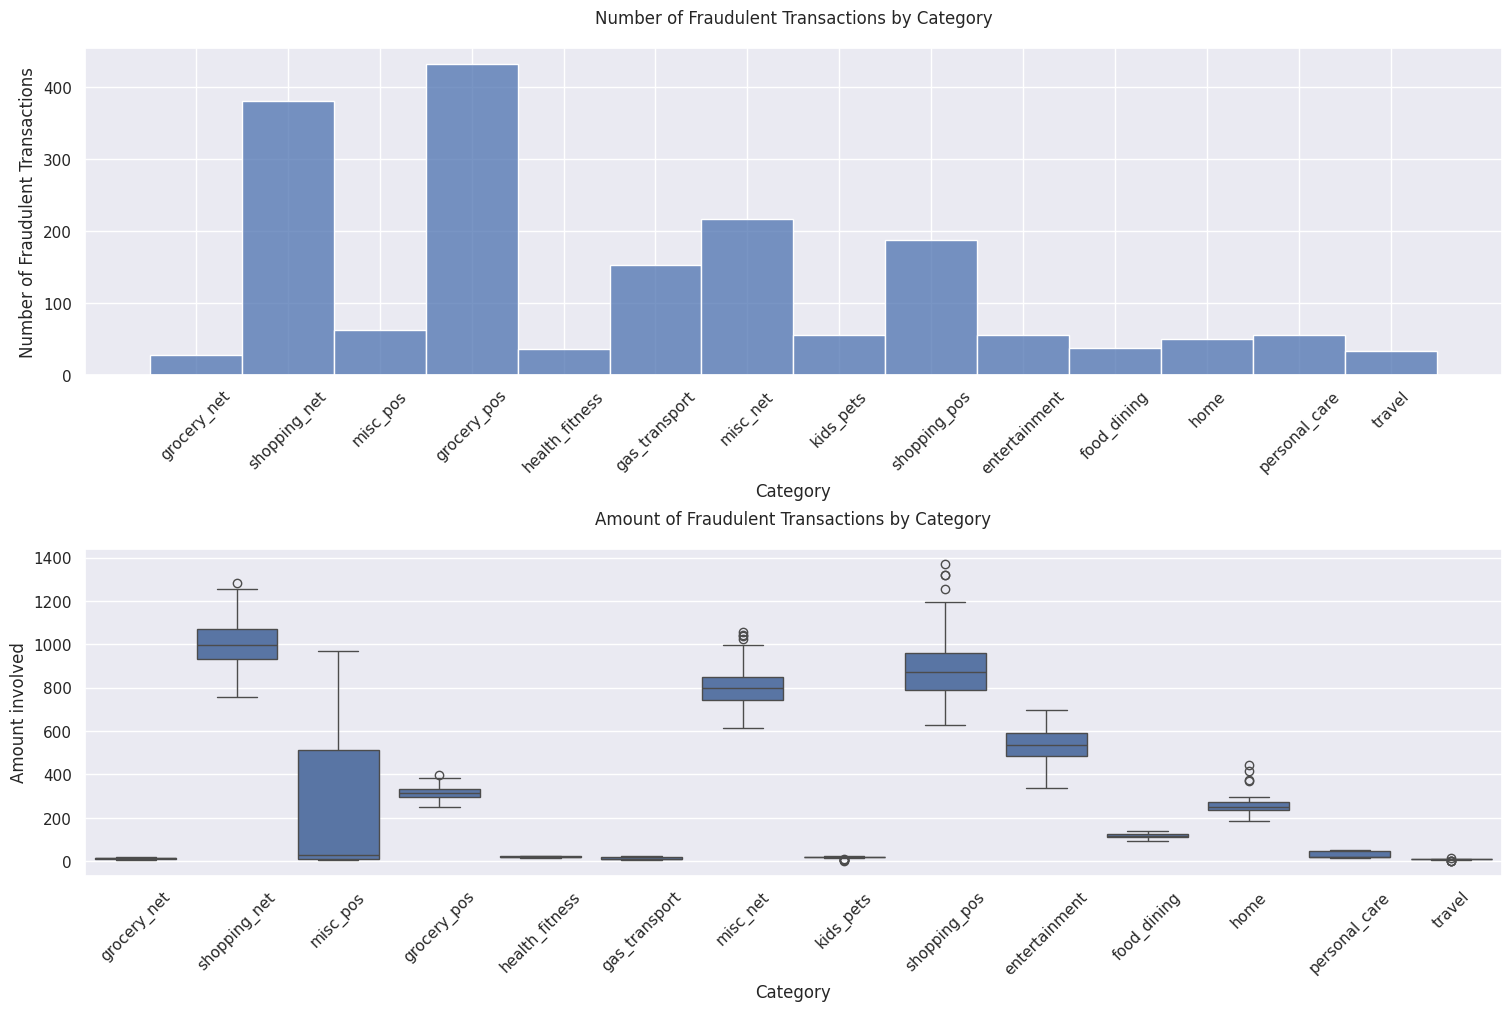

In [6]:
sns.set_theme(style="darkgrid")
fig, ax = plt.subplots(2,1, figsize = (15,10), constrained_layout=True)
sns.histplot(ax = ax[0], x='category', data = purchase[purchase['is_fraud'] == 1])
ax[0].tick_params(axis='x', rotation=45)
ax[0].set_ylabel('Number of Fraudulent Transactions')
ax[0].set_xlabel('Category')
ax[0].set_title('Number of Fraudulent Transactions by Category', y = 1.05)
sns.boxplot(ax = ax[1], x='category', y='amt', data = purchase[purchase['is_fraud'] == 1])
ax[1].tick_params(axis='x', labelrotation = 45)
ax[1].set_ylabel('Amount involved')
ax[1].set_xlabel('Category')
ax[1].set_title('Amount of Fraudulent Transactions by Category', y = 1.05)

Large number of frauds can be observed in shopping_net and grocery_pos
But amount higher in frauds can be observed in shopping_net and shopping_pos

Text(0, 0.5, 'Number of Fraudulent Transactions')

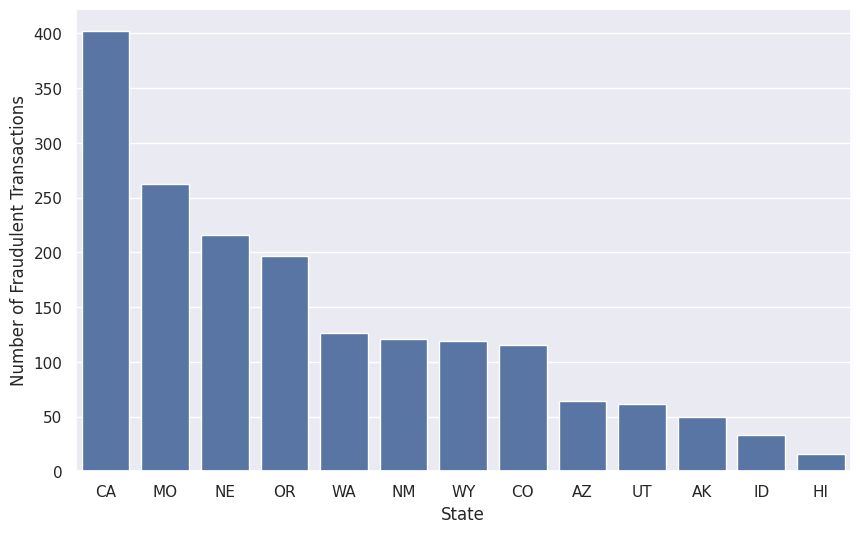

In [7]:
fraud_by_state = df[df['is_fraud'] == 1].groupby('state')['is_fraud'].count().sort_values(ascending = False)

# Plotting
plt.figure(figsize=(10, 6))
sns.barplot(x=fraud_by_state.index, y=fraud_by_state.values)
plt.xlabel('State')
plt.ylabel('Number of Fraudulent Transactions')

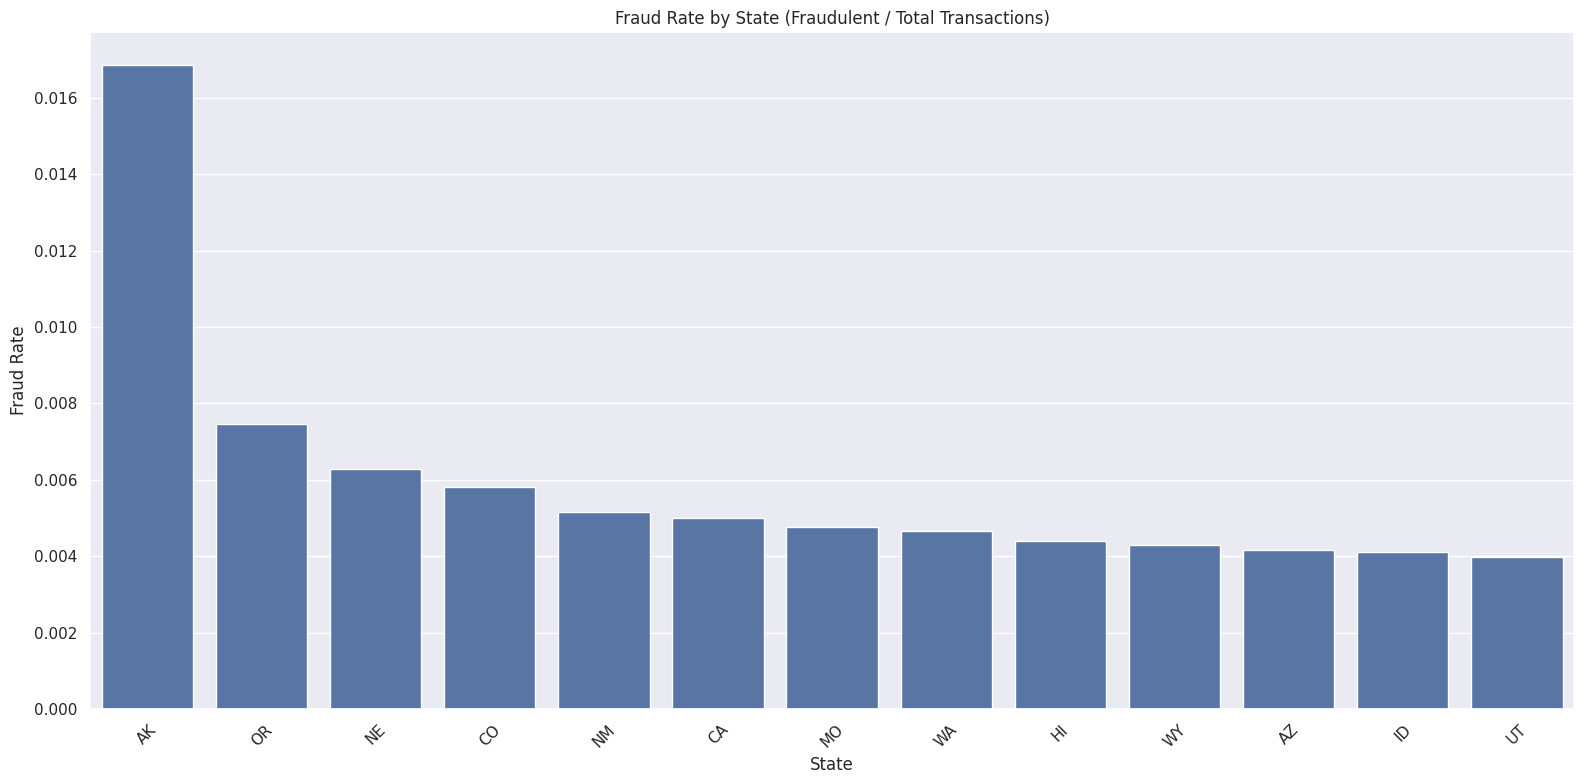

In [8]:
# Total transactions by state
total_by_state = df['state'].value_counts().reset_index()
total_by_state.columns = ['state', 'total_transactions']

# Fraudulent transactions by state
fraud_by_state = df[df['is_fraud'] == 1]['state'].value_counts().reset_index()
fraud_by_state.columns = ['state', 'fraud_transactions']

# Merge the two dataframes
state_stats = pd.merge(total_by_state, fraud_by_state, on='state', how='left').fillna(0)
state_stats['fraud_rate'] = state_stats['fraud_transactions'] / state_stats['total_transactions']

# Sort by fraud rate
state_stats_sorted = state_stats.sort_values(by='fraud_rate', ascending=False)

# Plot
plt.figure(figsize=(16, 8))
sns.barplot(x='state', y='fraud_rate', data=state_stats_sorted)
plt.xticks(rotation=45)
plt.xlabel("State")
plt.ylabel("Fraud Rate")
plt.title("Fraud Rate by State (Fraudulent / Total Transactions)")
plt.tight_layout()
plt.show()

Some less populous states have a surprisingly high fraud rate, even if their total transaction count is low.
Possibly indicating targeted fraud or weaker fraud prevention mechanisms
In contrast, California (CA), despite having the highest fraud volume, does not have the highest fraud rate due to its massive transaction base

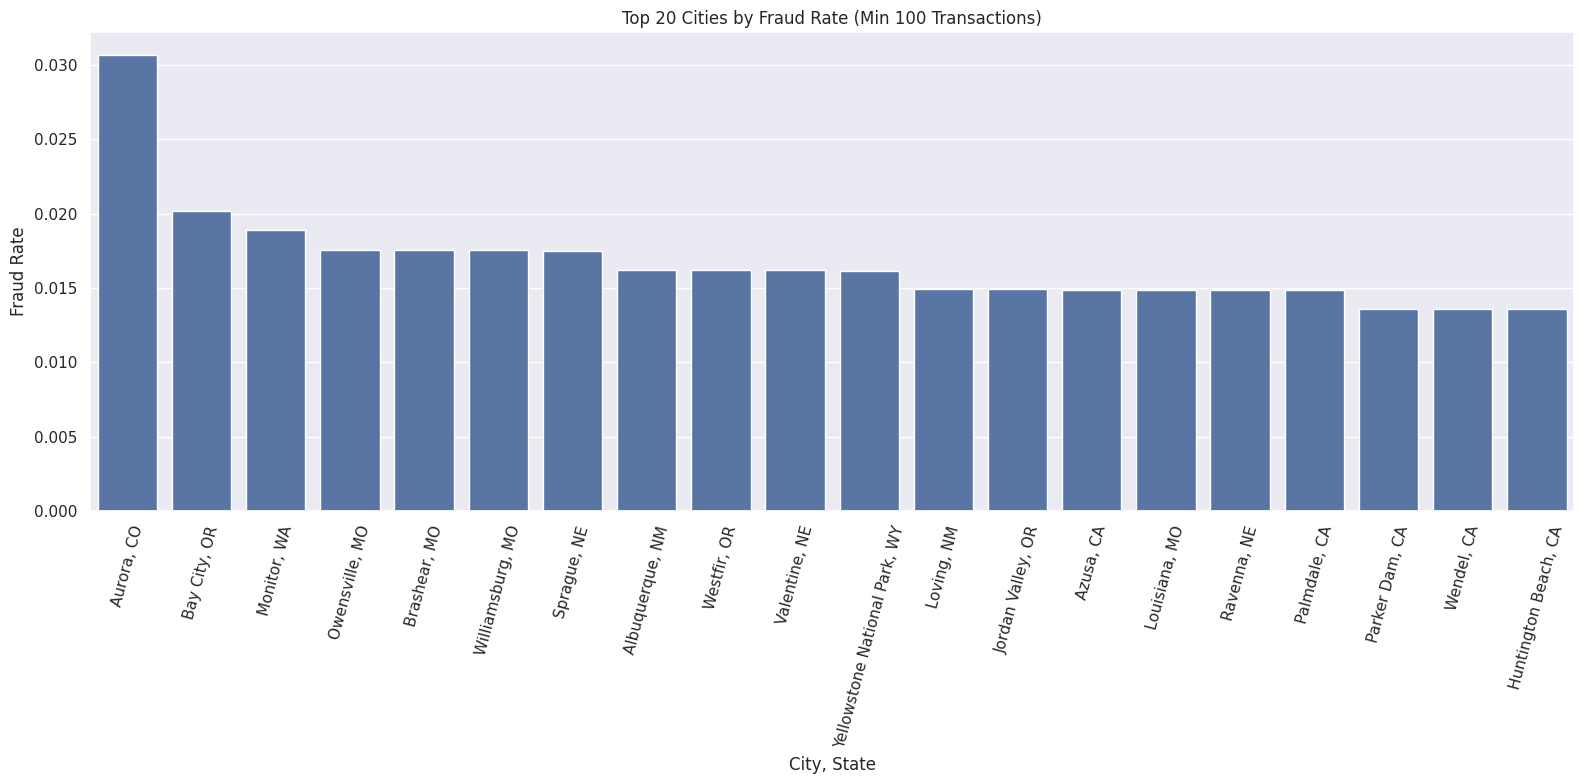

In [9]:
# Combine city and state in original dataframe
df['city_state'] = df['city'] + ", " + df['state']

# Count total and fraudulent transactions by city_state
total_by_city = df['city_state'].value_counts().reset_index()
total_by_city.columns = ['city_state', 'total_transactions']

fraud_by_city = df[df['is_fraud'] == 1]['city_state'].value_counts().reset_index()
fraud_by_city.columns = ['city_state', 'fraud_transactions']

# Merge and compute fraud rate
city_stats = pd.merge(total_by_city, fraud_by_city, on='city_state', how='left').fillna(0)
city_stats['fraud_rate'] = city_stats['fraud_transactions'] / city_stats['total_transactions']

# Filter cities with at least 100 transactions
filtered_city_stats = city_stats[city_stats['total_transactions'] >= 100]

# Sort by fraud rate and get top 20
top_cities_by_fraud_rate = filtered_city_stats.sort_values(by='fraud_rate', ascending=False).head(20)

# Plot
plt.figure(figsize=(16, 8))
sns.barplot(x='city_state', y='fraud_rate', data=top_cities_by_fraud_rate)
plt.xticks(rotation=75)
plt.xlabel("City, State")
plt.ylabel("Fraud Rate")
plt.title("Top 20 Cities by Fraud Rate (Min 100 Transactions)")
plt.tight_layout()
plt.show()

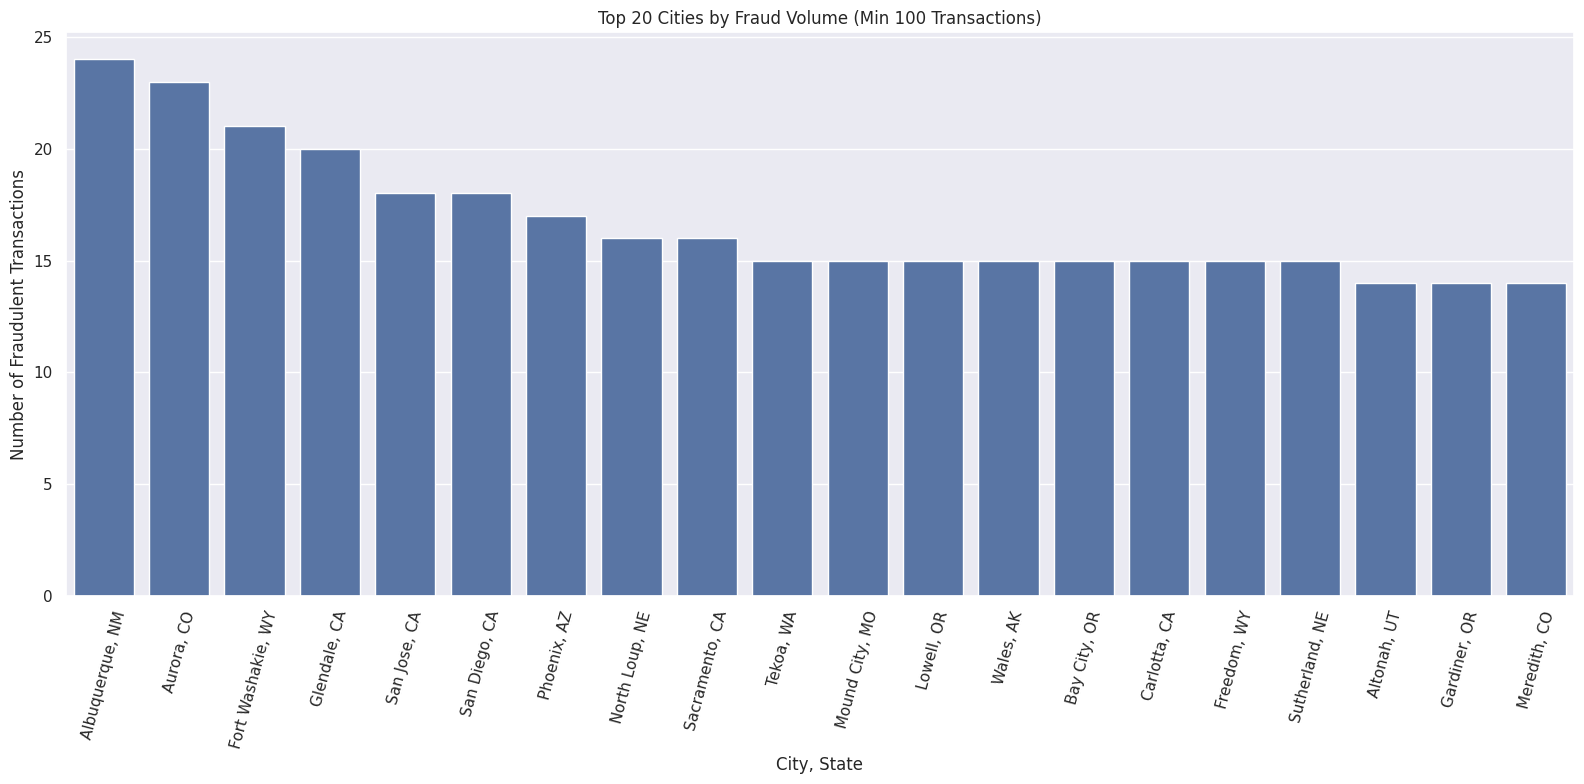

In [10]:
# Sort by fraud volume and get top 20
top_cities_by_fraud_volume = filtered_city_stats.sort_values(by='fraud_transactions', ascending=False).head(20)

# Plot
plt.figure(figsize=(16, 8))
sns.barplot(x='city_state', y='fraud_transactions', data=top_cities_by_fraud_volume)
plt.xticks(rotation=75)
plt.xlabel("City, State")
plt.ylabel("Number of Fraudulent Transactions")
plt.title("Top 20 Cities by Fraud Volume (Min 100 Transactions)")
plt.tight_layout()
plt.show()

In [11]:
from datetime import datetime, date

def calculate_age(born):
  born = datetime.strptime(born, "%Y-%m-%d").date()
  today = date.today()
  return today.year - born.year - ((today.month, today.day) < (born.month, born.day))

df['age'] = df['dob'].apply(calculate_age)
df

,trans_date_trans_time,merchant,category,amt,city,state,lat,long,city_pop,job,dob,trans_num,merch_lat,merch_long,is_fraud,city_state,age
0,2019-01-01 00:00:44,"Heller, Gutmann and Zieme",grocery_pos,107.23,Orient,WA,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,49.159047,-118.186462,0,"Orient, WA",46
1,2019-01-01 00:00:51,Lind-Buckridge,entertainment,220.11,Malad City,ID,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,43.150704,-112.154481,0,"Malad City, ID",63
2,2019-01-01 00:07:27,Kiehn Inc,grocery_pos,96.29,Grenada,CA,41.6125,-122.5258,589,Systems analyst,1945-12-21,413636e759663f264aae1819a4d4f231,41.657520,-122.230347,0,"Grenada, CA",79
3,2019-01-01 00:09:03,Beier-Hyatt,shopping_pos,7.77,High Rolls Mountain Park,NM,32.9396,-105.8189,899,Naval architect,1967-08-30,8a6293af5ed278dea14448ded2685fea,32.863258,-106.520205,0,"High Rolls Mountain Park, NM",57
4,2019-01-01 00:21:32,Bruen-Yost,misc_pos,6.85,Freedom,WY,43.0172,-111.0292,471,"Education officer, museum",1967-08-02,f3c43d336e92a44fc2fb67058d5949e3,43.753735,-111.454923,0,"Freedom, WY",57
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
339602,2020-12-31 23:57:56,Schmidt-Larkin,home,12.68,Wales,AK,64.7556,-165.6723,145,"Administrator, education",1939-11-09,a8310343c189e4a5b6316050d2d6b014,65.623593,-165.186033,0,"Wales, AK",85
339603,2020-12-31 23:58:04,"Pouros, Walker and Spence",kids_pets,13.02,Greenview,CA,41.5403,-122.9366,308,Call centre manager,1958-09-20,bd7071fd5c9510a5594ee196368ac80e,41.973127,-123.553032,0,"Greenview, CA",66
339604,2020-12-31 23:59:07,Reilly and Sons,health_fitness,43.77,Luray,MO,40.4931,-91.8912,519,Town planner,1966-02-13,9b1f753c79894c9f4b71f04581835ada,39.946837,-91.333331,0,"Luray, MO",59
339605,2020-12-31 23:59:15,Rau-Robel,kids_pets,86.88,Burbank,WA,46.1966,-118.9017,3684,Musician,1981-11-29,6c5b7c8add471975aa0fec023b2e8408,46.658340,-119.715054,0,"Burbank, WA",43


In [12]:
fraud_by_dob = df.groupby('age')['is_fraud'].sum()

In [13]:
bins = [10,20,30,40,50,60,70,80,90,100]
labels = [10,20,30,40,50,60,70,80,90]
df['age_group'] = pd.cut(df['age'], bins=bins, labels=labels, right=False)

In [14]:
fraud_by_age = df.groupby('age_group')['is_fraud'].sum()
fraud_by_age

<ipython-input-14-4815dfe86528>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  fraud_by_age = df.groupby('age_group')['is_fraud'].sum()


,is_fraud
age_group,
10,0
20,149
30,280
40,231
50,445
60,305
70,133
80,157
90,82


Text(0.5, 1.0, 'Number of Fraudulent Transactions by Age Group')

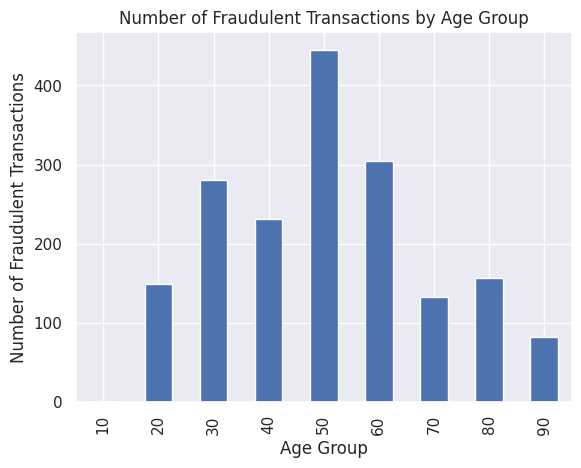

In [15]:
fraud_by_age.plot.bar()
plt.ylabel('Number of Fraudulent Transactions')
plt.xlabel('Age Group')
plt.title('Number of Fraudulent Transactions by Age Group')

Age 50 has peak fraud committed

In [16]:
# Convert transaction time to datetime
df['trans_date_trans_time'] = pd.to_datetime(df['trans_date_trans_time'])

# Extract time-related features
df['hour'] = df['trans_date_trans_time'].dt.hour
df['day_of_week'] = df['trans_date_trans_time'].dt.day_name()
df['month'] = df['trans_date_trans_time'].dt.month_name()

Text(0, 0.5, 'Count')

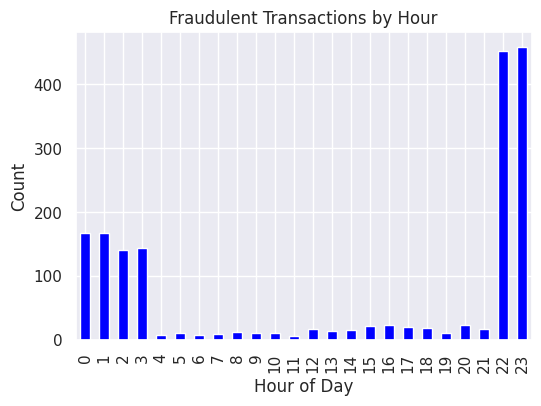

In [17]:
# Group and plot: Fraud by Hour
fraud_by_hour = df[df['is_fraud'] == 1].groupby('hour')['is_fraud'].count()

plt.figure(figsize=(20, 4))
plt.subplot(1, 3, 1)
fraud_by_hour.plot(kind='bar', color='blue')
plt.title('Fraudulent Transactions by Hour')
plt.xlabel('Hour of Day')
plt.ylabel('Count')

Big frauds happens during late night hours 22 to 3am

Text(0, 0.5, 'Count')

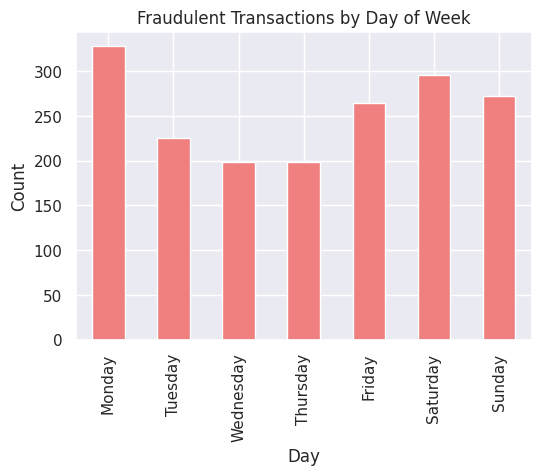

In [18]:
# Group and plot: Fraud by Day of Week
fraud_by_day = df[df['is_fraud'] == 1].groupby('day_of_week')['is_fraud'].count()
# Ensure correct day order
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
fraud_by_day = fraud_by_day.reindex(day_order)

plt.figure(figsize=(20, 4))
plt.subplot(1, 3, 2)
fraud_by_day.plot(kind='bar', color='lightcoral')
plt.title('Fraudulent Transactions by Day of Week')
plt.xlabel('Day')
plt.ylabel('Count')

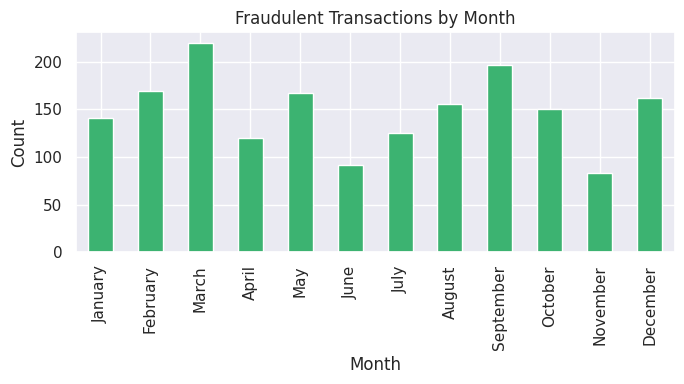

In [19]:
# Group and plot: Fraud by Month
fraud_by_month = df[df['is_fraud'] == 1].groupby('month')['is_fraud'].count()
# Order months
month_order = ['January', 'February', 'March', 'April', 'May', 'June',
               'July', 'August', 'September', 'October', 'November', 'December']
fraud_by_month = fraud_by_month.reindex(month_order)

plt.figure(figsize=(20, 4))
plt.subplot(1, 3, 3)
fraud_by_month.plot(kind='bar', color='mediumseagreen')
plt.title('Fraudulent Transactions by Month')
plt.xlabel('Month')
plt.ylabel('Count')

plt.tight_layout()
plt.show()

In [20]:
late_night = df[(df['is_fraud'] == 1) & ((df['hour'] >= 22) | (df['hour'] <= 3))]

In [21]:
# Count late-night frauds by category
late_night_fraud_by_category = late_night['category'].value_counts().reset_index()
late_night_fraud_by_category.columns = ['category', 'late_night_fraud_count']

<ipython-input-22-f61e5918cc8b>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='category', y='late_night_fraud_count', data=late_night_fraud_by_category, ax=ax1, palette='Reds_r')


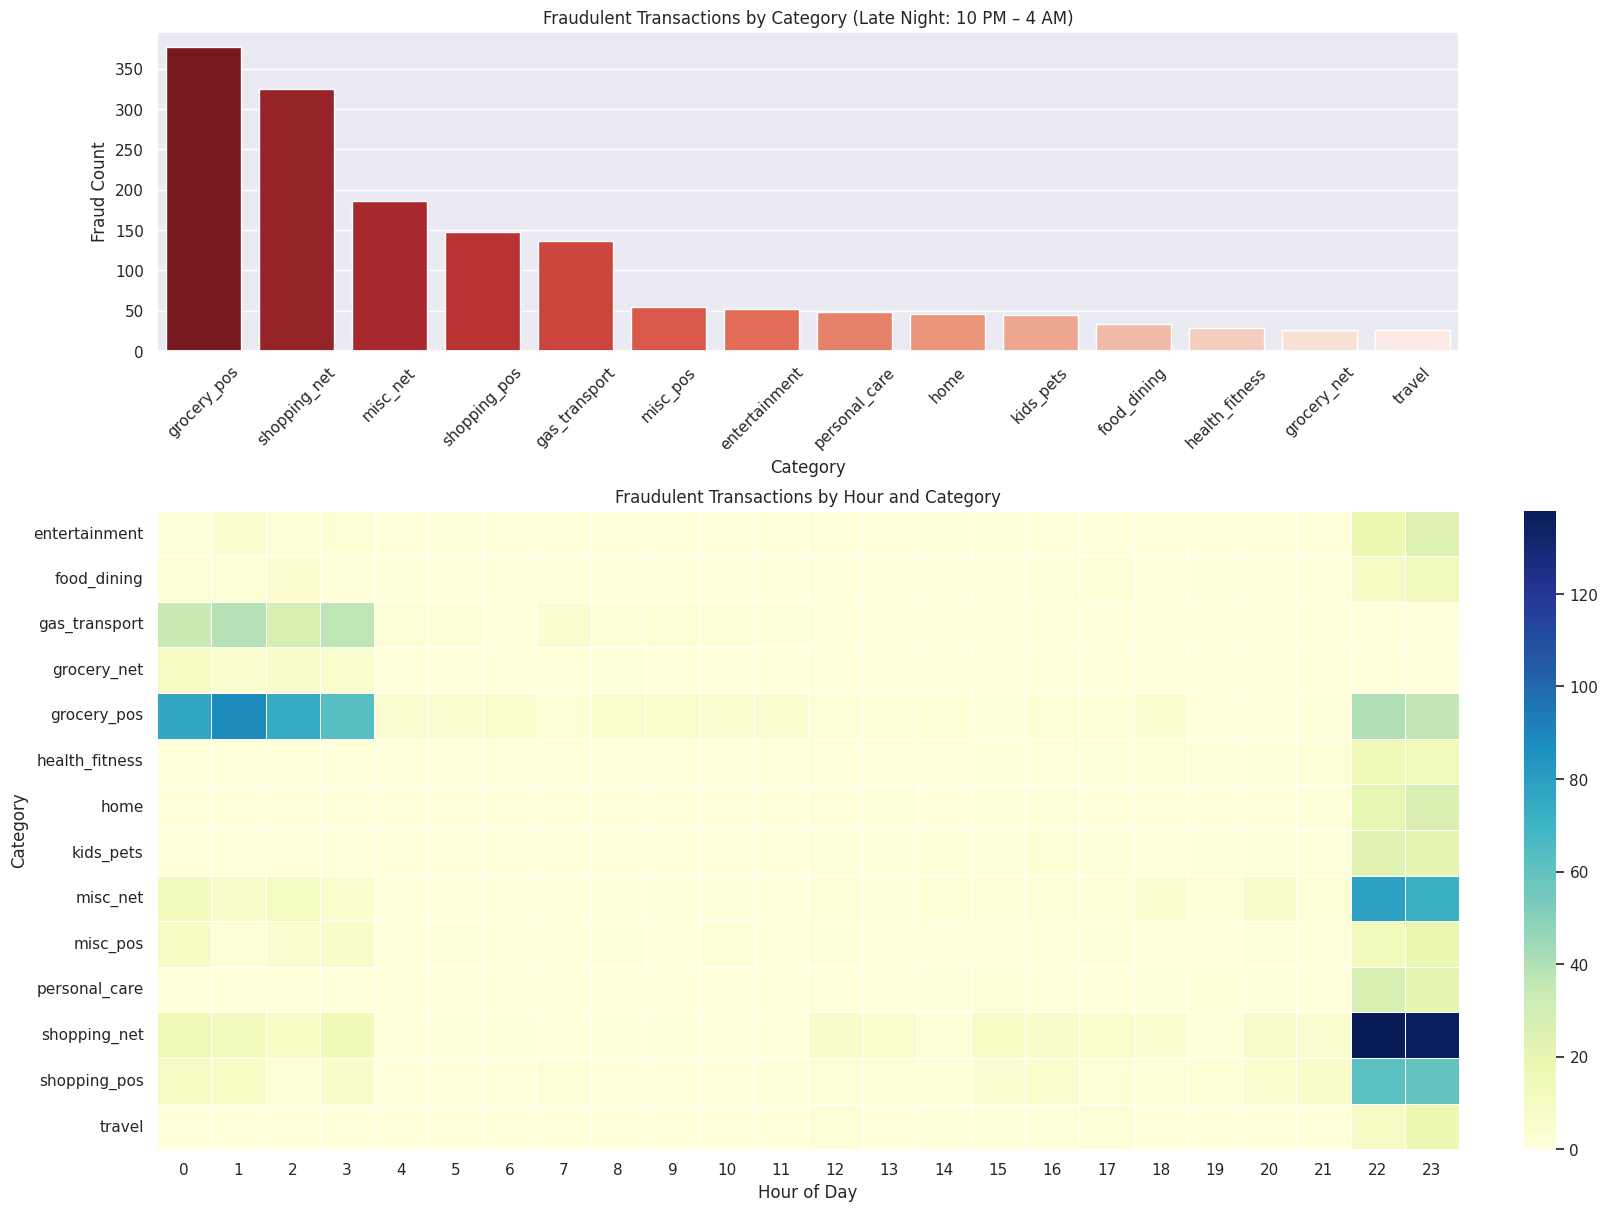

In [22]:
# ---------- Fraud Timing by Category (Heatmap) ----------
# Pivot table of fraud count by hour and category
fraud_by_hour_category = df[df['is_fraud'] == 1].groupby(['hour', 'category']).size().unstack(fill_value=0)

# Plotting
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(16, 12), gridspec_kw={'height_ratios': [1, 2]}, constrained_layout=True)

# Barplot: Late-night frauds by category
sns.barplot(x='category', y='late_night_fraud_count', data=late_night_fraud_by_category, ax=ax1, palette='Reds_r')
ax1.set_title("Fraudulent Transactions by Category (Late Night: 10 PM – 4 AM)")
ax1.set_xlabel("Category")
ax1.set_ylabel("Fraud Count")
ax1.tick_params(axis='x', rotation=45)

# Heatmap: Fraud timing by category
sns.heatmap(fraud_by_hour_category.T, cmap="YlGnBu", linewidths=0.5, ax=ax2)
ax2.set_title("Fraudulent Transactions by Hour and Category")
ax2.set_xlabel("Hour of Day")
ax2.set_ylabel("Category")

plt.show()

Frauds happen at late nights with purchases like shopping on the internet is the frequently happened activities followed by transactions at gas stations and grocery from 0 to 3am

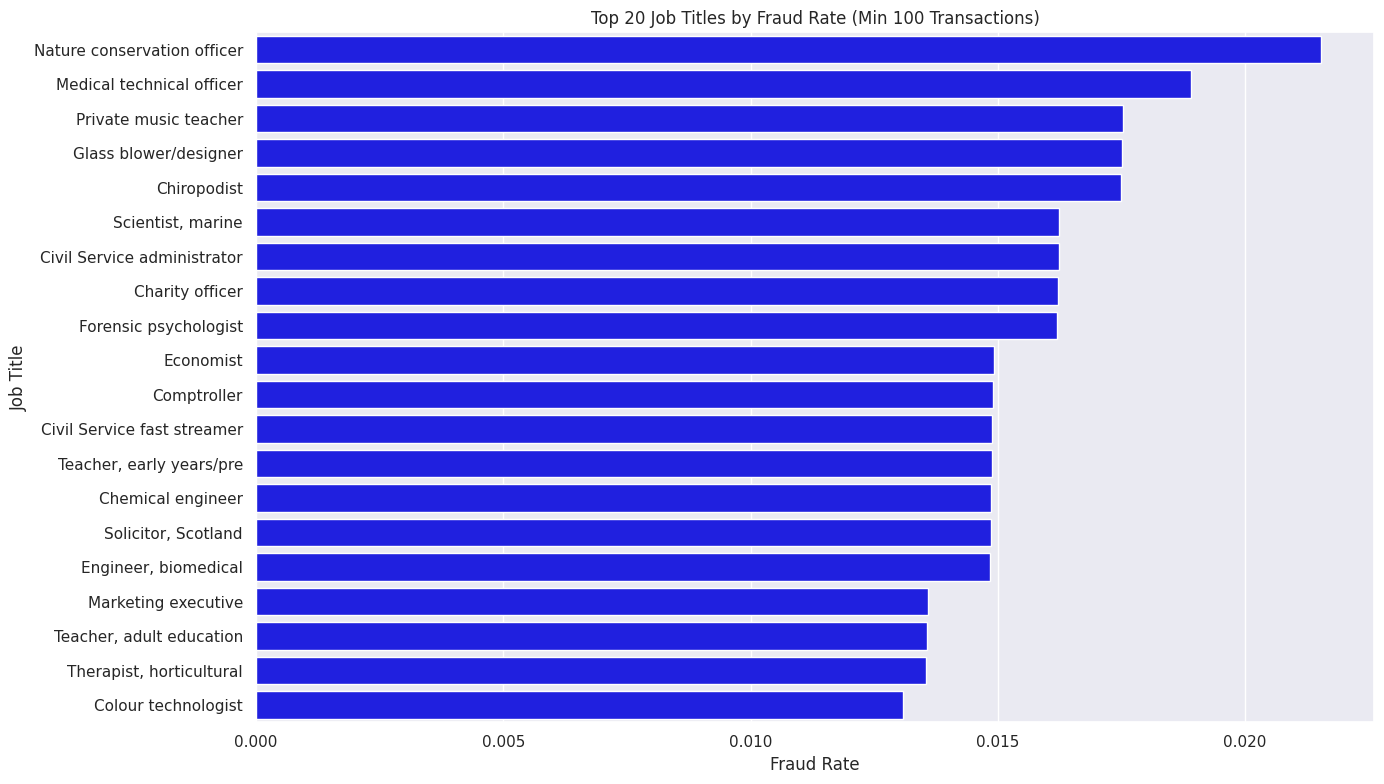

In [23]:
# Count total and fraudulent transactions by job
total_by_job = df['job'].value_counts().reset_index()
total_by_job.columns = ['job', 'total_txn']

fraud_by_job = df[df['is_fraud'] == 1]['job'].value_counts().reset_index()
fraud_by_job.columns = ['job', 'fraud_txn']

# Merge and calculate fraud rate
job_stats = pd.merge(total_by_job, fraud_by_job, on='job', how='left').fillna(0)
job_stats['fraud_rate'] = job_stats['fraud_txn'] / job_stats['total_txn']

# Filter jobs with at least 100 transactions
job_stats_filtered = job_stats[job_stats['total_txn'] >= 100]

# Sort and get top 20 by fraud rate
top_jobs_by_fraud_rate = job_stats_filtered.sort_values(by='fraud_rate', ascending=False).head(20)

# Plot
plt.figure(figsize=(14, 8))
sns.barplot(data=top_jobs_by_fraud_rate, x='fraud_rate', y='job', color='Blue')
plt.title("Top 20 Job Titles by Fraud Rate (Min 100 Transactions)")
plt.xlabel("Fraud Rate")
plt.ylabel("Job Title")
plt.tight_layout()
plt.show()

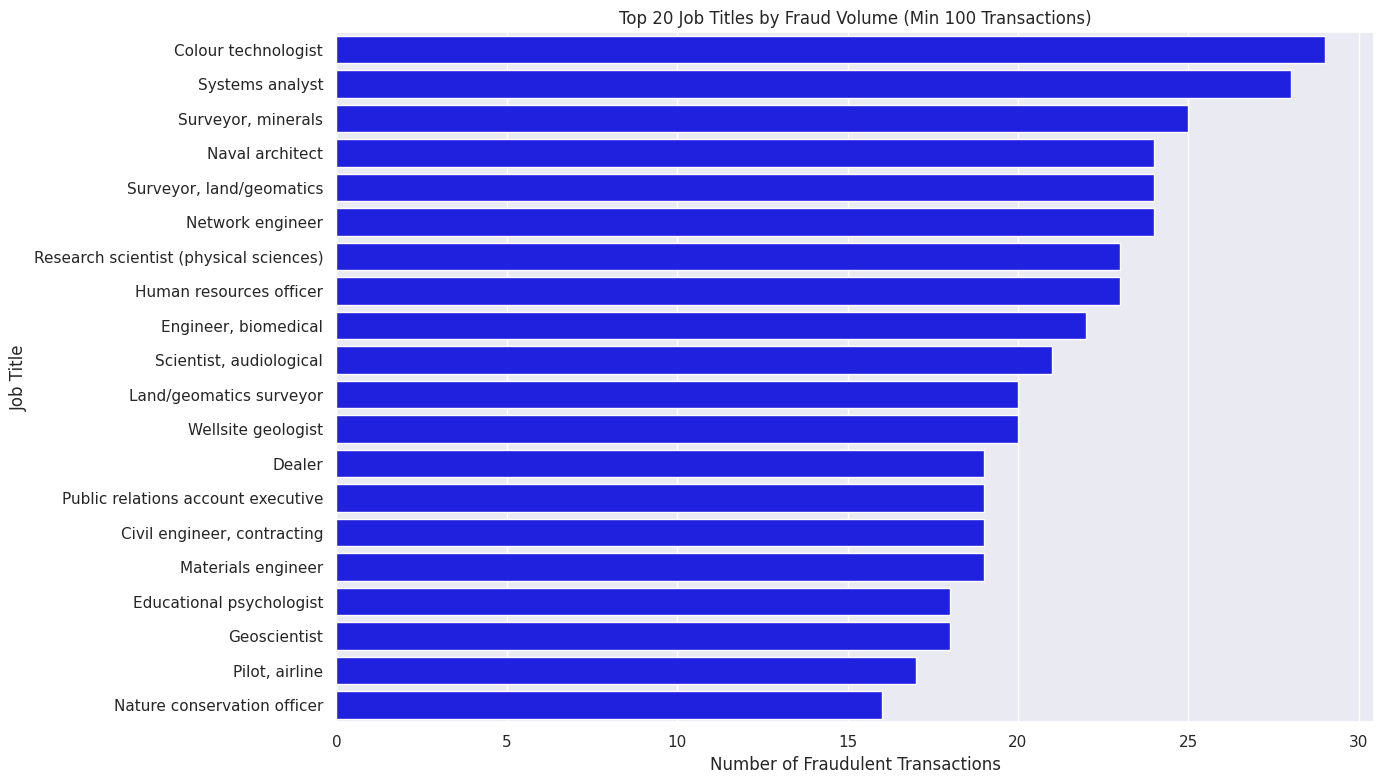

In [24]:
# Sort and get top 20 by number of fraudulent transactions
top_jobs_by_fraud_volume = job_stats_filtered.sort_values(by='fraud_txn', ascending=False).head(20)

# Plot
plt.figure(figsize=(14, 8))
sns.barplot(data=top_jobs_by_fraud_volume, x='fraud_txn', y='job', color='Blue')
plt.title("Top 20 Job Titles by Fraud Volume (Min 100 Transactions)")
plt.xlabel("Number of Fraudulent Transactions")
plt.ylabel("Job Title")
plt.tight_layout()
plt.show()

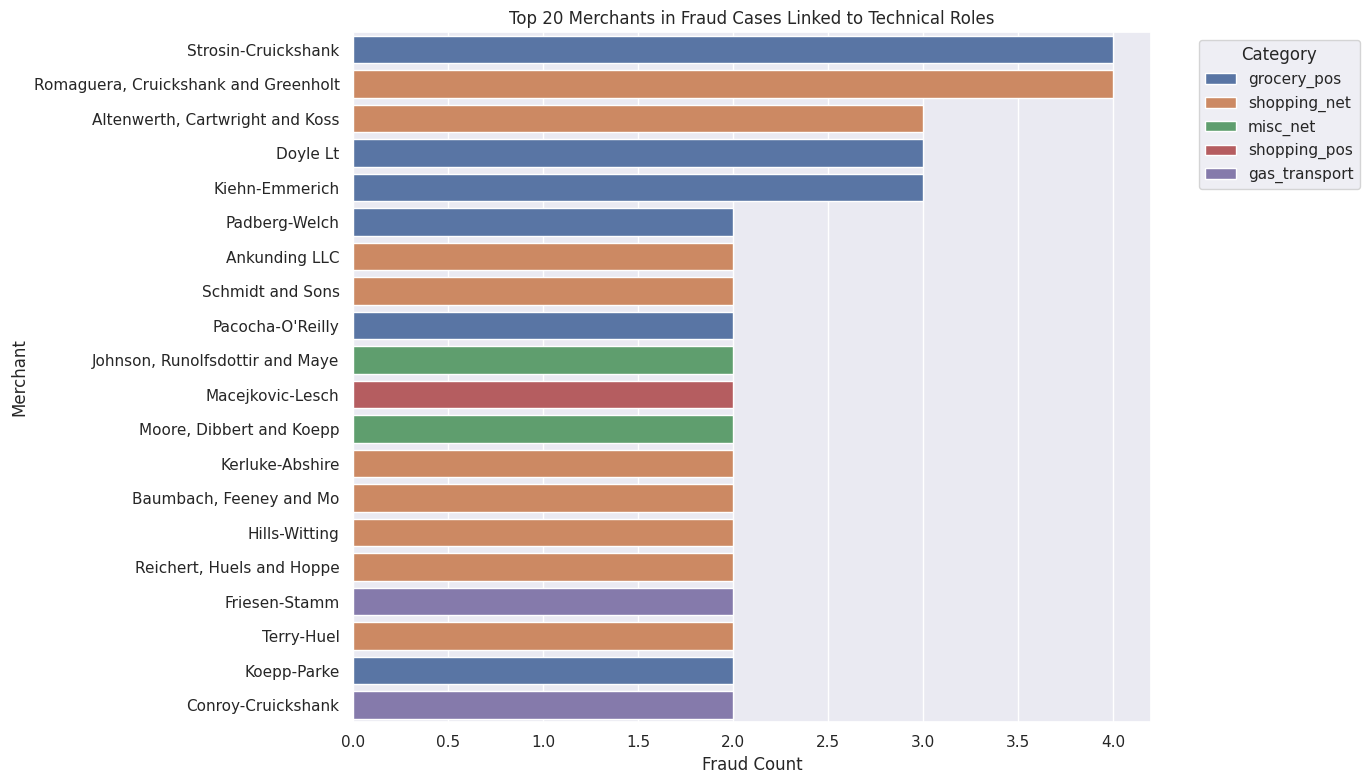

In [25]:
# Filter for technical roles (based on earlier chart)
technical_roles = [
    "Systems analyst", "Network engineer", "Engineer, biomedical", "Naval architect",
    "Research scientist (physical sciences)", "Materials engineer", "Colour technologist"
]

# Filter fraud transactions involving those roles
tech_fraud_df = df[(df['is_fraud'] == 1) & (df['job'].isin(technical_roles))]

# Fraud count by merchant among technical roles
fraud_by_merchant_tech = tech_fraud_df['merchant'].value_counts().reset_index()
fraud_by_merchant_tech.columns = ['merchant', 'fraud_count']

# Merge with category
merchant_category = df[['merchant', 'category']].drop_duplicates()
fraud_by_merchant_tech = pd.merge(fraud_by_merchant_tech, merchant_category, on='merchant', how='left')

# Top 20 suspicious merchants for technical professionals
top_merchant_tech = fraud_by_merchant_tech.head(20)

# Plot
plt.figure(figsize=(14, 8))
sns.barplot(data=top_merchant_tech, x='fraud_count', y='merchant', hue='category', dodge=False)
plt.title("Top 20 Merchants in Fraud Cases Linked to Technical Roles")
plt.xlabel("Fraud Count")
plt.ylabel("Merchant")
plt.legend(title="Category", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

Merchants Involved in Tech-Linked Frauds:
Technical professionals (like engineers and analysts) have frauds tied to online shopping and grocery merchants.

Suggests they’re likely victims of fraud or hacking, not perpetrators.

In [26]:
df.head()

,trans_date_trans_time,merchant,category,amt,city,state,lat,long,city_pop,job,...,trans_num,merch_lat,merch_long,is_fraud,city_state,age,age_group,hour,day_of_week,month
0,2019-01-01 00:00:44,"Heller, Gutmann and Zieme",grocery_pos,107.23,Orient,WA,48.8878,-118.2105,149,Special educational needs teacher,...,1f76529f8574734946361c461b024d99,49.159047,-118.186462,0,"Orient, WA",46,40,0,Tuesday,January
1,2019-01-01 00:00:51,Lind-Buckridge,entertainment,220.11,Malad City,ID,42.1808,-112.2620,4154,Nature conservation officer,...,a1a22d70485983eac12b5b88dad1cf95,43.150704,-112.154481,0,"Malad City, ID",63,60,0,Tuesday,January
2,2019-01-01 00:07:27,Kiehn Inc,grocery_pos,96.29,Grenada,CA,41.6125,-122.5258,589,Systems analyst,...,413636e759663f264aae1819a4d4f231,41.657520,-122.230347,0,"Grenada, CA",79,70,0,Tuesday,January
3,2019-01-01 00:09:03,Beier-Hyatt,shopping_pos,7.77,High Rolls Mountain Park,NM,32.9396,-105.8189,899,Naval architect,...,8a6293af5ed278dea14448ded2685fea,32.863258,-106.520205,0,"High Rolls Mountain Park, NM",57,50,0,Tuesday,January
4,2019-01-01 00:21:32,Bruen-Yost,misc_pos,6.85,Freedom,WY,43.0172,-111.0292,471,"Education officer, museum",...,f3c43d336e92a44fc2fb67058d5949e3,43.753735,-111.454923,0,"Freedom, WY",57,50,0,Tuesday,January


In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 339607 entries, 0 to 339606
Data columns (total 21 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   trans_date_trans_time  339607 non-null  datetime64[ns]
 1   merchant               339607 non-null  object        
 2   category               339607 non-null  object        
 3   amt                    339607 non-null  float64       
 4   city                   339607 non-null  object        
 5   state                  339607 non-null  object        
 6   lat                    339607 non-null  float64       
 7   long                   339607 non-null  float64       
 8   city_pop               339607 non-null  int64         
 9   job                    339607 non-null  object        
 10  dob                    339607 non-null  object        
 11  trans_num              339607 non-null  object        
 12  merch_lat              339607 non-null  floa

In [28]:
from sklearn.preprocessing import LabelEncoder
import pandas as pd

# Drop high-cardinality columns that may introduce noise or overfit
df = df.drop(columns=['city_state', 'job', 'merchant'])

# One-Hot Encoding for low-cardinality categorical variables
# These include: category, day_of_week, month, age_group
df = pd.get_dummies(df, columns=['category', 'day_of_week', 'month', 'age_group'], drop_first=True)

df.head()  # preview first 5 rows
df.info()  # check structure
df.columns  # list column names

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 339607 entries, 0 to 339606
Data columns (total 52 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   trans_date_trans_time    339607 non-null  datetime64[ns]
 1   amt                      339607 non-null  float64       
 2   city                     339607 non-null  object        
 3   state                    339607 non-null  object        
 4   lat                      339607 non-null  float64       
 5   long                     339607 non-null  float64       
 6   city_pop                 339607 non-null  int64         
 7   dob                      339607 non-null  object        
 8   trans_num                339607 non-null  object        
 9   merch_lat                339607 non-null  float64       
 10  merch_long               339607 non-null  float64       
 11  is_fraud                 339607 non-null  int64         
 12  age             

Index(['trans_date_trans_time', 'amt', 'city', 'state', 'lat', 'long',
       'city_pop', 'dob', 'trans_num', 'merch_lat', 'merch_long', 'is_fraud',
       'age', 'hour', 'category_food_dining', 'category_gas_transport',
       'category_grocery_net', 'category_grocery_pos',
       'category_health_fitness', 'category_home', 'category_kids_pets',
       'category_misc_net', 'category_misc_pos', 'category_personal_care',
       'category_shopping_net', 'category_shopping_pos', 'category_travel',
       'day_of_week_Monday', 'day_of_week_Saturday', 'day_of_week_Sunday',
       'day_of_week_Thursday', 'day_of_week_Tuesday', 'day_of_week_Wednesday',
       'month_August', 'month_December', 'month_February', 'month_January',
       'month_July', 'month_June', 'month_March', 'month_May',
       'month_November', 'month_October', 'month_September', 'age_group_20',
       'age_group_30', 'age_group_40', 'age_group_50', 'age_group_60',
       'age_group_70', 'age_group_80', 'age_group_90'],
   

# MODELS TRAINING AND TUNING

In [29]:
from sklearn.model_selection import train_test_split

X = df.drop(columns=['is_fraud', 'trans_date_trans_time', 'dob', 'trans_num', 'city', 'state', 'lat', 'long', 'merch_lat', 'merch_long'])  # Drop non-feature cols
y = df['is_fraud']

# Re-split the updated features
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, stratify=y, random_state=42
)

In [30]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

lr_model = LogisticRegression(max_iter=1000, class_weight='balanced', solver='newton-cg')
lr_model.fit(X_train, y_train)
y_pred = lr_model.predict(X_test)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

/usr/local/lib/python3.11/dist-packages/scipy/optimize/_linesearch.py:312: LineSearchWarning: The line search algorithm did not converge
  alpha_star, phi_star, old_fval, derphi_star = scalar_search_wolfe2(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/optimize.py:100: LineSearchWarning: The line search algorithm did not converge
  ret = line_search_wolfe2(


              precision    recall  f1-score   support

           0       1.00      0.89      0.94     84456
           1       0.04      0.74      0.07       446

    accuracy                           0.89     84902
   macro avg       0.52      0.82      0.51     84902
weighted avg       0.99      0.89      0.94     84902

[[75452  9004]
 [  117   329]]


In [31]:
from sklearn.metrics import roc_auc_score

print("ROC AUC:", roc_auc_score(y_test, lr_model.predict_proba(X_test)[:, 1]))

ROC AUC: 0.9037616265067151


In [32]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

rf = RandomForestClassifier(
    n_estimators=100,            # Number of trees
    max_depth=10,              # No limit for now
    class_weight='balanced',     # To handle fraud imbalance
    random_state=42,
    n_jobs=-1
)

rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99     84456
           1       0.31      0.85      0.46       446

    accuracy                           0.99     84902
   macro avg       0.66      0.92      0.73     84902
weighted avg       1.00      0.99      0.99     84902

[[83632   824]
 [   68   378]]


In [43]:
# from sklearn.model_selection import cross_val_score
# cross_val_score(rf, X, y, scoring='f1', cv=5)

Tuning DT

In [34]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

# Disabled hyperparameter tuning for showcasing purpose (it took 1 hour to run)
# param_grid = {
#    'n_estimators': [100, 200],
#    'max_depth': [5, 10, 15, None],
#    'min_samples_split': [2, 5, 10],
#    'min_samples_leaf': [1, 5, 10],
#    'max_features': ['sqrt'],
#    'class_weight': ['balanced']
#}

#rf = RandomForestClassifier(random_state=42, n_jobs=-1)
#grid = GridSearchCV(rf, param_grid, cv=3, scoring='f1', verbose=1)
#grid.fit(X_train, y_train)

#print("Best params:", grid.best_params_)
#print("Best F1 Score (CV):", grid.best_score_)

# Evaluate on test set
#y_pred = grid.best_estimator_.predict(X_test)
#print(classification_report(y_test, y_pred))

# Best params: {'class_weight': 'balanced', 'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 200}
# Best F1 Score (CV): 0.8319405410198183
#              precision    recall  f1-score   support

#           0       1.00      1.00      1.00     84456
#           1       0.94      0.74      0.83       446

#    accuracy                           1.00     84902
#   macro avg       0.97      0.87      0.91     84902
# weighted avg       1.00      1.00      1.00     84902

In [37]:
rf = RandomForestClassifier(
    n_estimators=200,
    max_features='sqrt',
    min_samples_split=10,
    min_samples_leaf=1,
    max_depth=None,              # No limit for now
    class_weight='balanced',     # To handle fraud imbalance
    random_state=42,
    n_jobs=-1
)

rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     84456
           1       0.94      0.74      0.83       446

    accuracy                           1.00     84902
   macro avg       0.97      0.87      0.91     84902
weighted avg       1.00      1.00      1.00     84902

[[84435    21]
 [  118   328]]


In [39]:
print("ROC AUC:", roc_auc_score(y_test, rf.predict_proba(X_test)[:, 1]))

ROC AUC: 0.9953665739816864


In [35]:
pip install xgboost

In [36]:
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Calculate class weight manually: ratio of negative to positive
scale_pos_weight = (y_train == 0).sum() / (y_train == 1).sum()

xgb = XGBClassifier(
    objective='binary:logistic',
    scale_pos_weight=scale_pos_weight,  # Helps balance class
    use_label_encoder=False,
    eval_metric='logloss',
    n_estimators=100,
    max_depth=6,
    learning_rate=0.1,
    random_state=42,
    n_jobs=-1
)

xgb.fit(X_train, y_train)
y_pred = xgb.predict(X_test)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [02:32:41] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


              precision    recall  f1-score   support

           0       1.00      0.99      0.99     84456
           1       0.30      0.94      0.45       446

    accuracy                           0.99     84902
   macro avg       0.65      0.96      0.72     84902
weighted avg       1.00      0.99      0.99     84902

[[83477   979]
 [   27   419]]


In [40]:
from sklearn.model_selection import RandomizedSearchCV
from xgboost import XGBClassifier

#xgb = XGBClassifier(
#    objective='binary:logistic',
#    use_label_encoder=False,
#    eval_metric='logloss',
#    random_state=42,
#    n_jobs=-1
#)
#param_grid = {
#    'n_estimators': [100, 200],              # Number of boosting rounds
#    'max_depth': [3, 6, 9],                  # Tree depth
#    'learning_rate': [0.01, 0.1, 0.2],       # Step size shrinkage
#    'subsample': [0.6, 0.8, 1.0],            # % of samples per tree
#    'colsample_bytree': [0.6, 0.8, 1.0],     # % of features per tree
#    'scale_pos_weight': [scale_pos_weight], # Already computed, include it
#    'gamma': [0, 1, 5],                      # Minimum loss reduction for further partition
#}

#random_search = RandomizedSearchCV(
#    xgb,
#    param_distributions=param_grid,
#    n_iter=30,                 # You can drop to 10–20 if time is tight
#    scoring='f1',
#    cv=3,
#    verbose=1,
#    random_state=42
#)

#random_search.fit(X_train, y_train)

#print("Best params:", random_search.best_params_)
#print("Best F1 (CV):", random_search.best_score_)

# Evaluate best model
#y_pred = random_search.best_estimator_.predict(X_test)
#print(classification_report(y_test, y_pred))

Fitting 3 folds for each of 30 candidates, totalling 90 fits


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [02:42:53] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [02:42:56] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [02:42:59] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [02:43:03] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [02:43:09] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_e

Best params: {'subsample': 0.6, 'scale_pos_weight': np.float64(189.64745508982037), 'n_estimators': 200, 'max_depth': 9, 'learning_rate': 0.2, 'gamma': 1, 'colsample_bytree': 1.0}
Best F1 (CV): 0.8344916672731243
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     84456
           1       0.80      0.86      0.83       446

    accuracy                           1.00     84902
   macro avg       0.90      0.93      0.91     84902
weighted avg       1.00      1.00      1.00     84902



In [ ]:
#Best params: {'subsample': 0.6, 'scale_pos_weight': np.float64(189.64745508982037), 'n_estimators': 200, 'max_depth': 9, 'learning_rate': 0.2, 'gamma': 1, 'colsample_bytree': 1.0}
#Best F1 (CV): 0.8344916672731243
#              precision    recall  f1-score   support

#          0       1.00      1.00      1.00     84456
#           1       0.80      0.86      0.83       446

#    accuracy                           1.00     84902
#   macro avg       0.90      0.93      0.91     84902
# weighted avg       1.00      1.00      1.00     84902

In [42]:
xgb = XGBClassifier(
    objective='binary:logistic',
    scale_pos_weight=scale_pos_weight,
    use_label_encoder=False,
    eval_metric='logloss',
    n_estimators=1000,
    max_depth=None,
    learning_rate=0.2,
    gamma=1,
    colsample_bytree=1.0,
    subsample=0.6,
    random_state=42,
    n_jobs=-1
)

xgb.fit(X_train, y_train)
y_pred = xgb.predict(X_test)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [02:59:39] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


              precision    recall  f1-score   support

           0       1.00      1.00      1.00     84456
           1       0.80      0.86      0.83       446

    accuracy                           1.00     84902
   macro avg       0.90      0.93      0.91     84902
weighted avg       1.00      1.00      1.00     84902

[[84359    97]
 [   62   384]]


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [03:14:48] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


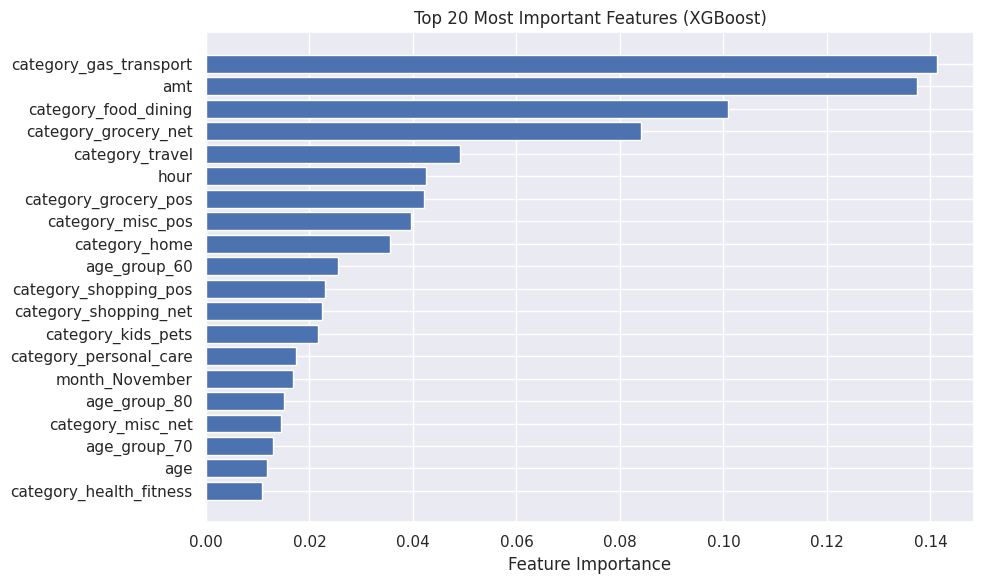

In [44]:
# Recalculate scale_pos_weight just in case
scale_pos_weight = (y_train == 0).sum() / (y_train == 1).sum()

xgb = XGBClassifier(
    objective='binary:logistic',
    scale_pos_weight=scale_pos_weight,
    use_label_encoder=False,
    eval_metric='logloss',
    n_estimators=1000,
    max_depth=None,
    learning_rate=0.2,
    gamma=1,
    colsample_bytree=1.0,
    subsample=0.6,
    random_state=42,
    n_jobs=-1
)

xgb.fit(X_train, y_train)

# Get feature importance as a DataFrame
importance_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': xgb.feature_importances_
}).sort_values(by='Importance', ascending=False)

# Plot top 20 features
top_n = 20
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'][:top_n][::-1], importance_df['Importance'][:top_n][::-1])
plt.xlabel("Feature Importance")
plt.title(f"Top {top_n} Most Important Features (XGBoost)")
plt.tight_layout()
plt.grid(True)
plt.show()